# English CHILDES Dataset reFormatting

Extracting speech from the childes corpus and organising it in the following format:

```
├── Eng-NA
│   ├── adult
│   │   ├── *.txt
│   ├── child
│   │   ├── *.txt
│   └── metadata.csv
└── Eng-UK
    ├── adult
    │   ├── *.txt
    ├── child
    │   ├── *.txt
    └── metadata.csv
```
Each first folder corresponds to a Language_Accent.
- English North America
- English United Kingdom.

The `child` folder contains child speech the `adult` folder contains adult speech.
File are named after the original CHILDES folders so we do not remove the link between child/adult sets.
The metadata folder contains information about contents:

| file_id           | lang  child_gender | child_age |         |
|-------------------|--------------------|-----------|---------|
| Haggerty_haggerty | eng                | female    | 2;07.18 |
| Brown_Eve_010600b | eng                | female    | 1;06.00 |
| Brown_Eve_010600a | eng                | female    | 1;06.00 |

Items that do not have a `child_gender` or `child_age` columns signify those files did not contain child speech.

In [1]:
import platform

from lexical_benchmark import settings
from lexical_benchmark.datasets.human import childes
from lexical_benchmark.utils import timed_status

assert (
    platform.node() in settings.PATH.KNOWN_HOSTS
), "Not in a known device, must provide custom PATH locations"

prep = childes.CHILDESPreparation()
prep.load_dir(settings.PATH.source_childes / "Eng-NA", "Eng-NA")
prep.load_dir(settings.PATH.source_childes / "Eng-UK", "Eng-UK")
with timed_status(status="Extracting Speech & Formatting CHILDES", complete_status="Finished building raw/CHILDES"):
    prep.export(settings.PATH.raw_childes)

Output()

Output()

Done.


# Dataset Cleaning

Using the given rules we create a clean version (speech only) of the dataset.

The rules can be found [here](https://github.com/nhamilakis/Lexical-benchmark/blob/dev/docs/datasets/childes.md)

In [1]:
import platform

from lexical_benchmark import settings
from lexical_benchmark.datasets.human import childes
from lexical_benchmark.utils import timed_status

assert platform.node() in settings.PATH.KNOWN_HOSTS, "Code Running in a unknown device, you must provide custom PATH locations"

cleaner = childes.CHILDESCleaner()

with timed_status(status="Cleaning CHILDES dataset", complete_status="Finished creating clean/CHILDES"):
    cleaner.mk_clean()

Output()

Finished creating clean/CHILDES (Total time: 21 minutes and 55 seconds)

### Word Filtering

#### Build CHILDES Extras dictionairy

In [2]:
from lexical_benchmark.datasets.human import childes
from lexical_benchmark.utils import timed_status

childes_extras_lexique = childes.CHILDESExtrasLexicon()
with timed_status(status="Loading CHILDES extra words", complete_status="Completed Building childes_extra words"):
    childes_extras_lexique.add_lang("Eng-NA", "adult")
    childes_extras_lexique.add_lang("Eng-NA", "child")
    childes_extras_lexique.add_lang("Eng-UK", "adult")
    childes_extras_lexique.add_lang("Eng-UK", "child")
    # Cache dictionairy to make loading faster
    hash_id = childes_extras_lexique.cache_current()

print(f"Found {len(childes_extras_lexique.words)=} words from childes meta logs.")
print(f"Cached dictionairy with id:: {hash_id}")

Output()

Completed Building childes_extra words (Total time: 18 seconds)

Found len(childes_extras_lexique.words)=22038 words from childes meta logs.
Cached dictionairy with id:: e9c0d55cf62ba9e937fe273de7626661


#### Filter words

In [3]:
from lexical_benchmark.datasets import utils
from lexical_benchmark.datasets.human import childes
from lexical_benchmark.utils import timed_status

dataset = childes.CleanCHILDESFiles()
en_cleaner = utils.DictionairyCleaner(lang="EN", childes_extra_id="e9c0d55cf62ba9e937fe273de7626661")

with timed_status(status="Filtering Eng-NA/adult", complete_status="Completed Eng-NA/adult"):
    dataset.filter_words(lang_accent="Eng-NA", speech_type="adult", cleaner=en_cleaner)

with timed_status(status="Filtering Eng-NA/child", complete_status="Completed Eng-NA/child"):
    dataset.filter_words(lang_accent="Eng-NA", speech_type="child", cleaner=en_cleaner)

with timed_status(status="Filtering Eng-UK/adult", complete_status="Completed Eng-UK/adult"):
    dataset.filter_words(lang_accent="Eng-UK", speech_type="adult", cleaner=en_cleaner)

with timed_status(status="Filtering Eng-UK/child", complete_status="Completed Eng-UK/child"):
    dataset.filter_words(lang_accent="Eng-UK", speech_type="child", cleaner=en_cleaner)

Output()

Completed Eng-NA/adult (Total time: 49 seconds)

Output()

Completed Eng-NA/child (Total time: 46 seconds)

Output()

Completed Eng-UK/adult (Total time: 27 seconds)

Output()

Completed Eng-UK/child (Total time: 19 seconds)

#### Computing cleanup stats

In [4]:
from rich.console import Console
from lexical_benchmark.datasets.human import childes
from lexical_benchmark.utils import timed_status

dataset = childes.CleanCHILDESFiles()


def show_stats(lang_accent: str, speech_type: str) -> None:
    items = dataset.word_stats(lang_accent=lang_accent, speech_type=speech_type)
    # Print counts
    all_count = items["all"]
    bad_count = items["bad"]
    good_count = items["good"]
    percent_bad = (bad_count / all_count)
    percent_good = (good_count / all_count)

    print(f"---- {lang_accent}/{speech_type} ----")
    print(f"- Kept {good_count:_}/{all_count:_} words")
    print(f"- Rejected {bad_count:_}/{all_count:_} words")
    print(f"- We have a {percent_bad:.2%} of word elimination !!")
    print(f"- We have a {percent_good:.2%} of word retention !!")
    print("-" * 25)


# Show stats
show_stats("Eng-NA", "adult")
show_stats("Eng-UK", "adult")
show_stats("Eng-NA", "child")
show_stats("Eng-UK", "child")

---- Eng-NA/adult ----
- Kept 7_916_864/7_953_776 words
- Rejected 36_912/7_953_776 words
- We have a 0.46% of word elimination !!
- We have a 99.54% of word retention !!
-------------------------
---- Eng-UK/adult ----
- Kept 8_020_622/8_041_204 words
- Rejected 20_582/8_041_204 words
- We have a 0.26% of word elimination !!
- We have a 99.74% of word retention !!
-------------------------
---- Eng-NA/child ----
- Kept 2_877_439/2_908_126 words
- Rejected 30_687/2_908_126 words
- We have a 1.06% of word elimination !!
- We have a 98.94% of word retention !!
-------------------------
---- Eng-UK/child ----
- Kept 2_954_477/2_965_974 words
- Rejected 11_497/2_965_974 words
- We have a 0.39% of word elimination !!
- We have a 99.61% of word retention !!
-------------------------


#### Export Word Frequencies

In [6]:
from pathlib import Path
from lexical_benchmark.datasets.human import childes
from lexical_benchmark.utils import timed_status

dataset = childes.CleanCHILDESFiles()

Path('childes_wf').mkdir(exist_ok=True, parents=True)
with timed_status(status="Extracting Clean WF", complete_status="Saved clean WF in childes_wf"):
    dataset.clean_word_frequency("Eng-NA", "adult").to_csv("childes_wf/clean_words.en_na.adult.csv", index=False)
    dataset.clean_word_frequency("Eng-UK", "adult").to_csv("childes_wf/clean_words.en_uk.adult.csv", index=False)
    dataset.clean_word_frequency("Eng-NA", "child").to_csv("childes_wf/clean_words.en_na.child.csv", index=False)
    dataset.clean_word_frequency("Eng-UK", "child").to_csv("childes_wf/clean_words.en_na.child.csv", index=False)


with timed_status(status="Extracting Rejects WF", complete_status="Saved Rejects WF in childes_wf"):
    dataset.rejected_word_frequency("Eng-NA", "adult").to_csv("childes_wf/rejected_words.en_na.adult.csv", index=False)
    dataset.rejected_word_frequency("Eng-UK", "adult").to_csv("childes_wf/rejected_words.en_uk.adult.csv", index=False)
    dataset.rejected_word_frequency("Eng-NA", "child").to_csv("childes_wf/rejected_words.en_na.child.csv", index=False)
    dataset.rejected_word_frequency("Eng-UK", "child").to_csv("childes_wf/rejected_words.en_na.child.csv", index=False)

Output()

Saved clean WF in childes_wf (Total time: 1 seconds)

Output()

Saved Rejects WF in childes_wf (Total time: 1 seconds)

#### Spliting speech by age.

We create a grouping of children by age per month.

This will give us discreet groupings of 1month old, 2month olds etc..

In [1]:
from lexical_benchmark import settings
from lexical_benchmark.datasets.human import childes
from rich.console import Console

with Console().status("Building child age splits..."):
    organizer = childes.OrganizeByAge(settings.PATH.clean, ["Eng-NA", "Eng-UK"])
    organizer.make_age_splits()
    organizer.build_splits()
print("Splits build succesfully...")

Output()

Splits build succesfully...


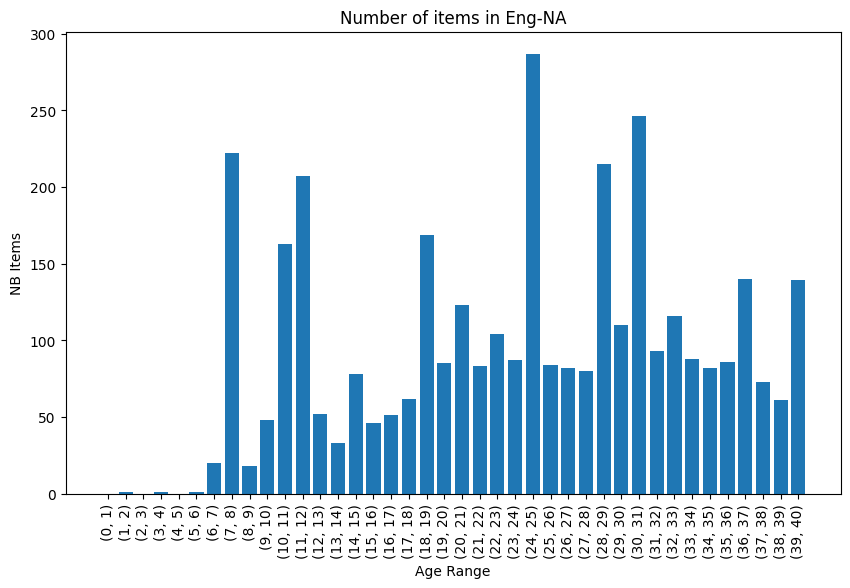

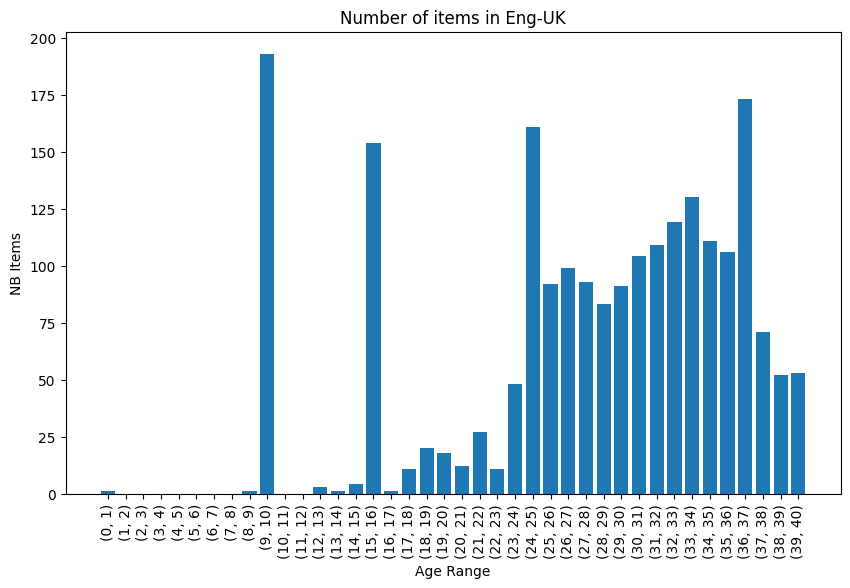

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from lexical_benchmark import settings

for lang in ("Eng-NA", "Eng-UK"):

    freq_map = {}
    for min_age, max_age in settings.CHILDES.AGE_RANGES:
        location = settings.PATH.clean_childes / lang / "child_by_age" / f"{min_age}_{max_age}"
        freq_map[f"({min_age}, {max_age})"] = len(list(location.glob('*.txt')))

    age_range, nb_items = zip(*list(freq_map.items()), strict=True)
    plt.figure(figsize=(10, 6))
    plt.bar(age_range, nb_items)
    plt.xlabel("Age Range")
    plt.ylabel("NB Items")
    plt.title(f"Number of items in {lang}")
    plt.xticks(rotation=90)
    plt.savefig(f"childes_index-{lang}.png")

# Other tasks

- [ ] Create account of words / non-words / extra_words
- [ ] Do some stats on types & other info

> Extra words are words added by registering tags from Annotations

## Reset Word filtering

In [ ]:
from lexical_benchmark.datasets import utils
from lexical_benchmark.datasets.human import childes
from lexical_benchmark.utils import timed_status

dataset = childes.CleanCHILDESFiles()
en_cleaner = utils.DictionairyCleaner(lang="EN", childes_extra_id="e9c0d55cf62ba9e937fe273de7626661")

with timed_status(status="Filtering Eng-NA/adult", complete_status="Completed Eng-NA/adult"):
    dataset.filter_words(lang_accent="Eng-NA", speech_type="adult", cleaner=en_cleaner)

with timed_status(status="Filtering Eng-NA/child", complete_status="Completed Eng-NA/child"):
    dataset.filter_words(lang_accent="Eng-NA", speech_type="child", cleaner=en_cleaner)

with timed_status(status="Filtering Eng-UK/adult", complete_status="Completed Eng-UK/adult"):
    dataset.filter_words(lang_accent="Eng-UK", speech_type="adult", cleaner=en_cleaner)

with timed_status(status="Filtering Eng-UK/child", complete_status="Completed Eng-UK/child"):
    dataset.filter_words(lang_accent="Eng-UK", speech_type="child", cleaner=en_cleaner)